<a href="https://colab.research.google.com/github/Ellen-Gu/jupyter-colab/blob/main/openai_api_code_convert_exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


**For short and simple code, the openai code converting works well. Now let's try some long and more complex codes.**

In [ ]:
import os
import openai

**To make the openai.api_key = os.getenv("OPENAI_API_KEY") works in secure way, I switch from google host connection to local host, on which I have a dockered jupyter running (please refer to the colab testing notebook for details of how to connect colab to the local dockered environment). Then in the local host terminal I set up the /home/$USER/.profile to hold the export OPENAI_API_KEY=XXXX. The XXXX is ther API key created by openai for my account:**

In [ ]:
openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.Completion.create(
  model="text-davinci-003",
  prompt='''##### Translate this function  from Python into R, using ggplot and tidyverse \n
  ### Python\n    \n
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random normal values
np.random.seed(0)  # Set a seed for reproducibility
values = np.random.randn(100)

# Create a histogram with space between bins
plt.hist(values, bins='auto', density=True, alpha=0.7, rwidth=0.85)

# Add a density line
x = np.linspace(values.min(), values.max(), 100)
density = (1 / (np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2))
plt.plot(x, density, color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Standard Normal Random Sample Histogram Plot with Density Lines')

# Display the plot
plt.show()


  ### R '''
  ,temperature=0
  ,max_tokens=150
  ,top_p=1.0
  ,frequency_penalty=0.0
  ,presence_penalty=0.0
  ,stop=["###"]
)

In [ ]:
for choice in response['choices']:
    print(choice['text'])



library(tidyverse)

# Generate 100 random normal values
set.seed(0)  # Set a seed for reproducibility
values <- rnorm(100)

# Create a histogram with space between bins
ggplot(data = values, aes(x = values)) +
  geom_histogram(bins = 'auto', density = TRUE, alpha = 0.7, fill = 'blue', color = 'black', binwidth = 0.85) +
  geom_density(color = 'red', linewidth = 2) +
  xlab('Values') +
  ylab('Density') +
  gg


The above R code generated by openai is not working out of box, but can serve as the base to further debug and revise. The followings are the revised one:

In [ ]:
''' This is R code
library(tidyverse)

# Generate 100 random normal values
set.seed(123)  # Set a seed for reproducibility
values <- rnorm(1000)

# Convert values to a data frame
df <- data.frame(values)

colors <- c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf")


# Create a histogram with small space between bins and soft color
gg=ggplot(data = df, aes(x = values)) +
  geom_histogram(bins = 26, aes(y = ..density..), fill = '#1f77b4', color = 'white', alpha = 0.7, position = 'identity', boundary = 0.3, width = 0.4) +
  geom_density(color = 'red', linewidth = 1) +
  xlab('Values') +
  ylab('Density') +
  ggtitle('Standard Normal Random Sample Histogram Plot with Density Lines') +
  theme(plot.title = element_text(hjust = 0.5))
gg

'''


**The following is generated by local Rstudio dockered in my DEV env, based on the R code converted by openai from python codes:**

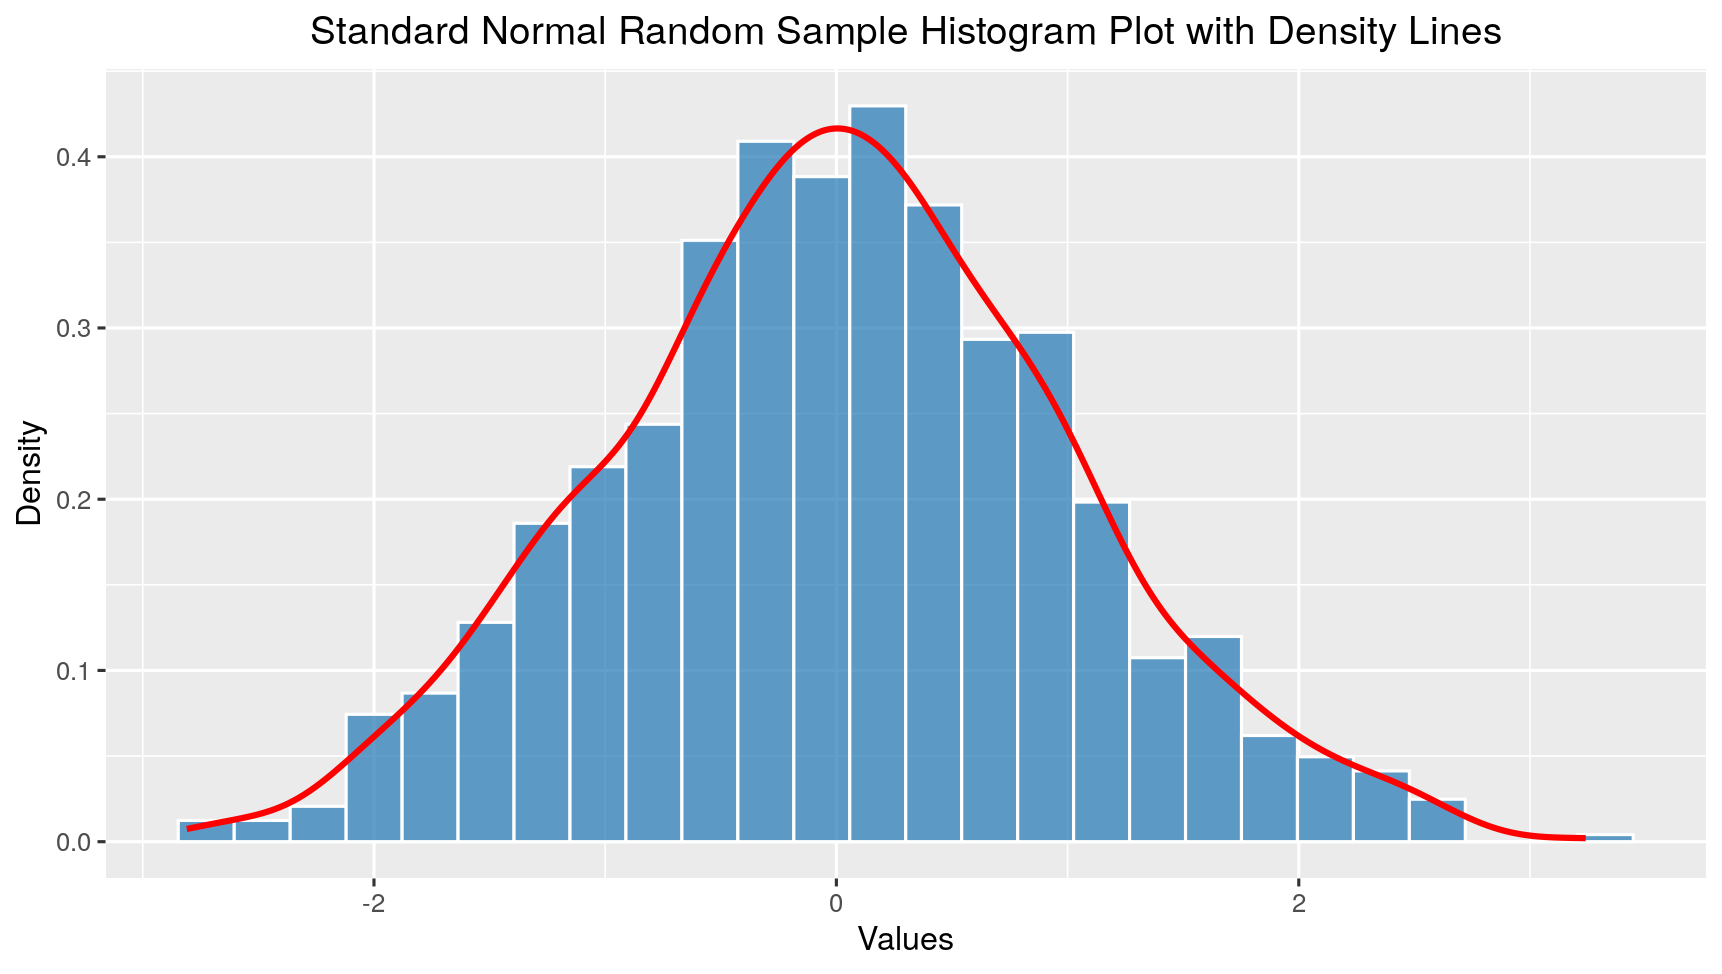

**The following is the original python code, with plot:**

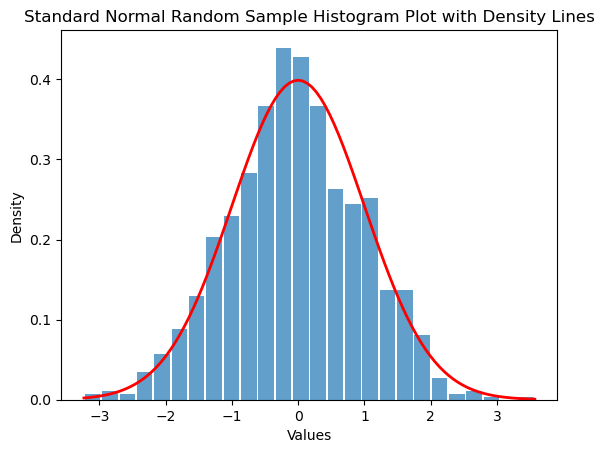

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random normal values
np.random.seed(123)  # Set a seed for reproducibility
values = np.random.randn(1000)

# Create a histogram with space between bins
plt.hist(values, bins='auto', density=True, alpha=0.7, rwidth=0.9)

# Add a density line
x = np.linspace(values.min(), values.max(), 100)
density = (1 / (np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2))
plt.plot(x, density, color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Standard Normal Random Sample Histogram Plot with Density Lines')

# Display the plot
plt.show()


**The followings is the python code for simulate two sets od 2d normal randome variables, plot is as below with 90% and 95% CI:**

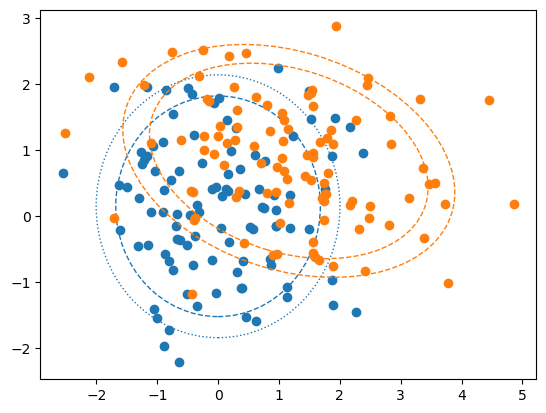

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Set seed for reproducibility
np.random.seed(0)

# Number of points
num_points = 100

# Mean and covariance matrix for the first set (standard normal)
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]  # Identity covariance matrix

# Generate the first set of points (standard normal)
set1_points = np.random.multivariate_normal(mean1, cov1, num_points)

# Mean and covariance matrix for the second set
mean2 = [1, 1]
cov2 = [[2, 0], [0, 1]]  # Diagonal covariance matrix

# Generate the second set of points with correlation coefficient (rho) of 0.3
rho = -0.3
cov2[0][1] = cov2[1][0] = np.sqrt(cov2[0][0] * cov2[1][1]) * rho  # Set the off-diagonal element for correlation
set2_points = np.random.multivariate_normal(mean2, cov2, num_points)

# Calculate confidence intervals for both sets
conf_interval_90_set1 = 1.645 * np.std(set1_points, axis=0)
conf_interval_95_set1 = 1.96 * np.std(set1_points, axis=0)

cov_matrix_set2 = np.cov(set2_points.T)
eigenvalues_set2, eigenvectors_set2 = np.linalg.eig(cov_matrix_set2)
angle_set2 = np.degrees(np.arctan2(eigenvectors_set2[1, 0], eigenvectors_set2[0, 0]))
conf_interval_90_set2 = 1.645 * np.sqrt(eigenvalues_set2)
conf_interval_95_set2 = 1.96 * np.sqrt(eigenvalues_set2)

# Plot the two sets of points with confidence intervals
fig, ax = plt.subplots()

# Set 1
plt.scatter(set1_points[:, 0], set1_points[:, 1], label='Set 1', color='#1f77b4')

ellipse_90_set1 = Ellipse(xy=np.mean(set1_points, axis=0), width=conf_interval_90_set1[0]*2, height=conf_interval_90_set1[1]*2, fill=False, color='#1f77b4', linestyle='--', label='90% Confidence Interval (Set 1)')
ax.add_patch(ellipse_90_set1)

ellipse_95_set1 = Ellipse(xy=np.mean(set1_points, axis=0), width=conf_interval_95_set1[0]*2, height=conf_interval_95_set1[1]*2, fill=False, color='#1f77b4', linestyle=':', label='95% Confidence Interval (Set 1)')
ax.add_patch(ellipse_95_set1)

# Set 2
plt.scatter(set2_points[:, 0], set2_points[:, 1], label='Set 2', color='#ff7f0e')

ellipse_90_set2 = Ellipse(xy=np.mean(set2_points, axis=0), width=conf_interval_90_set2[0]*2, height=conf_interval_90_set2[1]*2, angle=angle_set2, fill=False, color='#ff7f0e', linestyle='--', label='90% Confidence Interval (Set 2)')
ax.add_patch(ellipse_90_set2)
ellipse_95_set2 = Ellipse(xy=np.mean(set2_points, axis=0), width=conf_interval_95_set2[0]*2, height=conf_interval_95_set2[1]*2, angle=angle_set2, fill=False, color='#ff7f0e', linestyle='--', label='95% Confidence Interval (Set 2)')
ax.add_patch(ellipse_95_set2)


**Tried to convert this in openai but it always stops in the middle. when testing in the playground in openai website, it keeps asking to push the submit button to continue generating. since the code is long and complicated, even with chatgpt4 the codes translated into R is not very workable. However, as the previous case, the R code from openai can serve as a base to further revise. The following is the R code which is working by maanully adjusted, plot (generated by local dockered rstudio as well) is also attached:**

In [ ]:
'''
R code
library(MASS) library(ggplot2)

Set seed for reproducibility
set.seed(0)

Number of points
num_points <- 100

Mean and covariance matrix for the first set (standard normal)
mean1 <- c(0, 0) cov1 <- matrix(c(1, 0, 0, 1), nrow = 2, ncol = 2) #### Identity covariance matrix

Generate the first set of points (standard normal)
set1_points <- mvrnorm(num_points, mean1, cov1)

Mean and covariance matrix for the second set
mean2 <- c(1, 1) cov2 <- matrix(c(2, 0, 0, 1), nrow = 2, ncol = 2) #### Diagonal covariance matrix

Generate the second set of points with correlation coefficient (rho) of 0.3
rho <- -0.3 cov2[1, 2] <- sqrt(cov2[1, 1] * cov2[2, 2]) * rho #### Set the off-diagonal element for correlation cov2[2, 1]=cov2[1, 2] set2_points <- mvrnorm(num_points, mean2, cov2)

Calculate confidence intervals for both sets
conf_interval_90_set1 <- 1.645 * apply(set1_points, 2, sd) conf_interval_95_set1 <- 1.96 * apply(set1_points, 2, sd)

cov_matrix_set2 <- cov(set2_points) eigen_set2 <- eigen(cov_matrix_set2) angle_set2 <- atan2(eigen_set2 vectors[2,1],eigenset2 vectors[1, 1]) conf_interval_90_set2 <- 1.645 * sqrt(eigen_set2 values)confinterval95set2<−1.96∗sqrt(eigenset2 values)

Create data frames for each set of points
set1_df <- data.frame(X = set1_points[, 1], Y = set1_points[, 2]) set2_df <- data.frame(X = set2_points[, 1], Y = set2_points[, 2])

Plot the two sets of points with confidence intervals
ggplot() + geom_point(data = set1_df, aes(x = X, y = Y), color = "####1f77b4") + stat_ellipse(data = set1_df, aes(x = X, y = Y), geom = "polygon", level = 0.9, linetype = "dashed", color = "####1f77b4", fill = NA) + stat_ellipse(data = set1_df, aes(x = X, y = Y), geom = "polygon", level = 0.95, linetype = "dotted", color = "####1f77b4", fill = NA) + geom_point(data = set2_df, aes(x = X, y = Y), color = "####ff7f0e") + stat_ellipse(data = set2_df, aes(x = X, y = Y), geom = "polygon", level = 0.9, linetype = "dashed", color = "####ff7f0e", fill = NA) + stat_ellipse(data = set2_df, aes(x = X, y = Y), geom = "polygon", level = 0.95, linetype = "dotted", color = "####ff7f0e", fill = NA) + coord_fixed()
'''

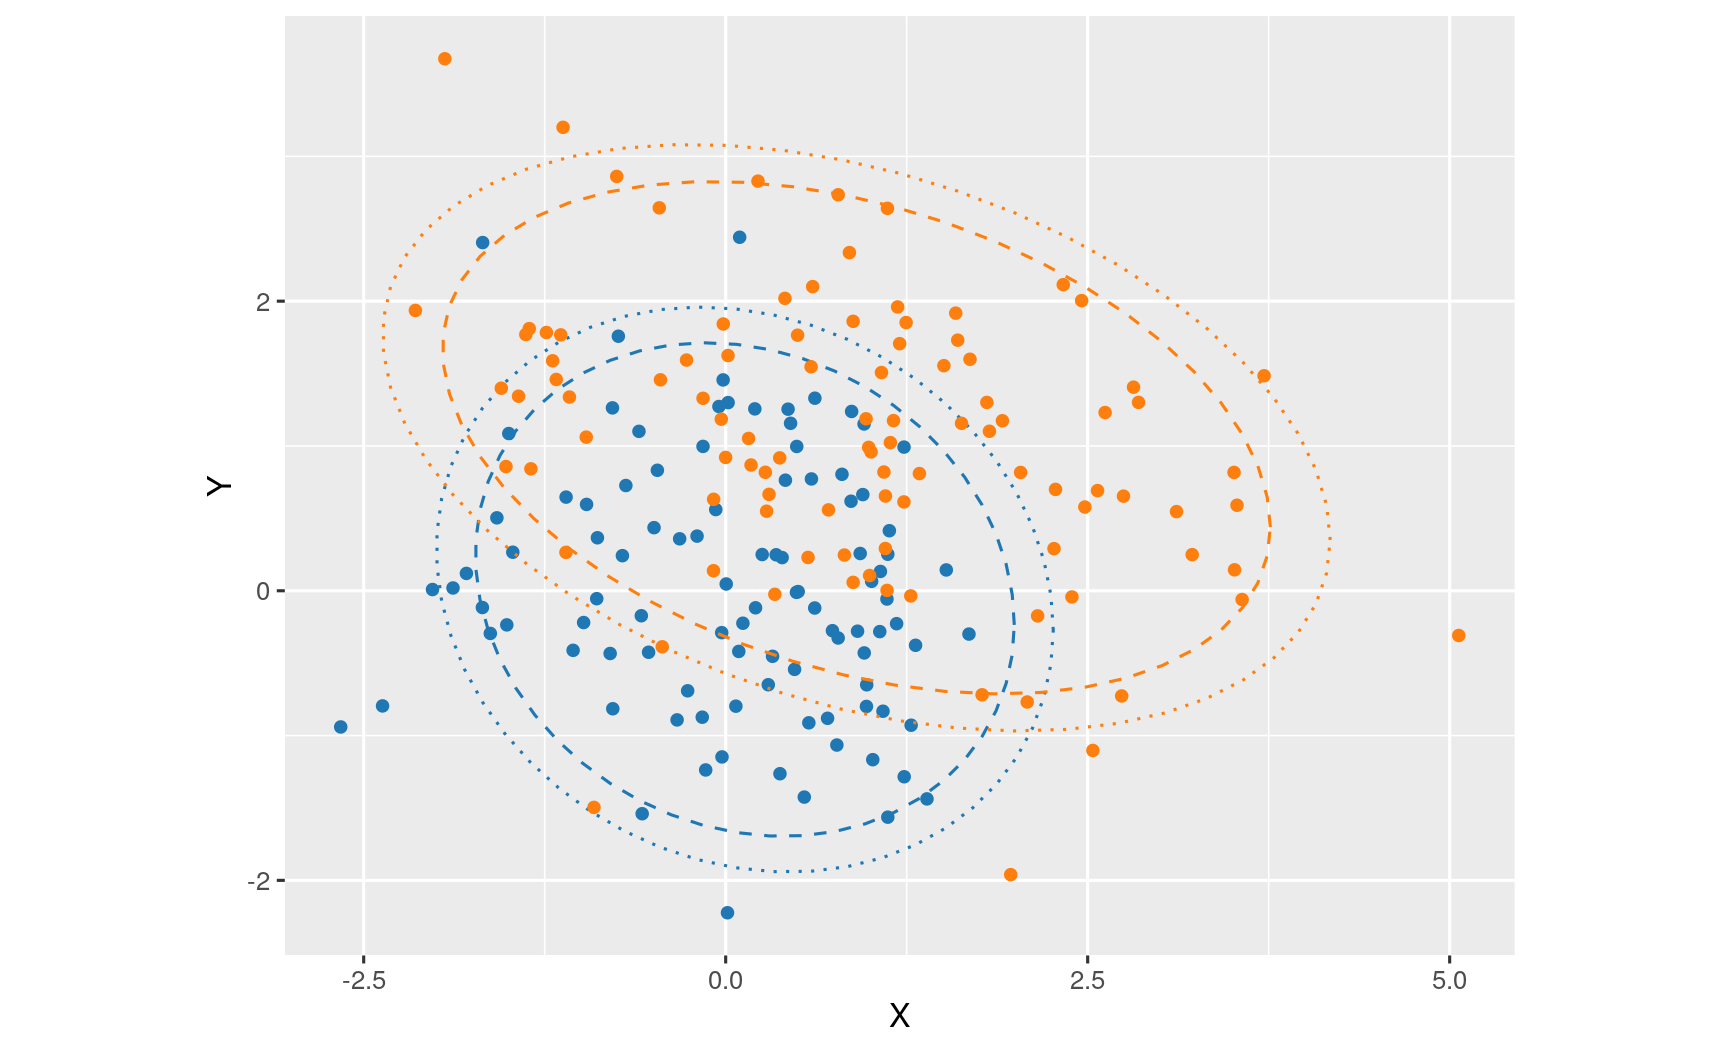
